In [1]:
# Import libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
archive_path = "archive"

dfs = []
for filename in os.listdir(archive_path):
    if filename.endswith(".csv") and filename.startswith("new_york_times_stories_"):
        file_path = os.path.join(archive_path, filename)
        
        df = pd.read_csv(file_path, dtype={"print_page": str})
        dfs.append(df)

df = pd.concat(dfs, ignore_index=True)

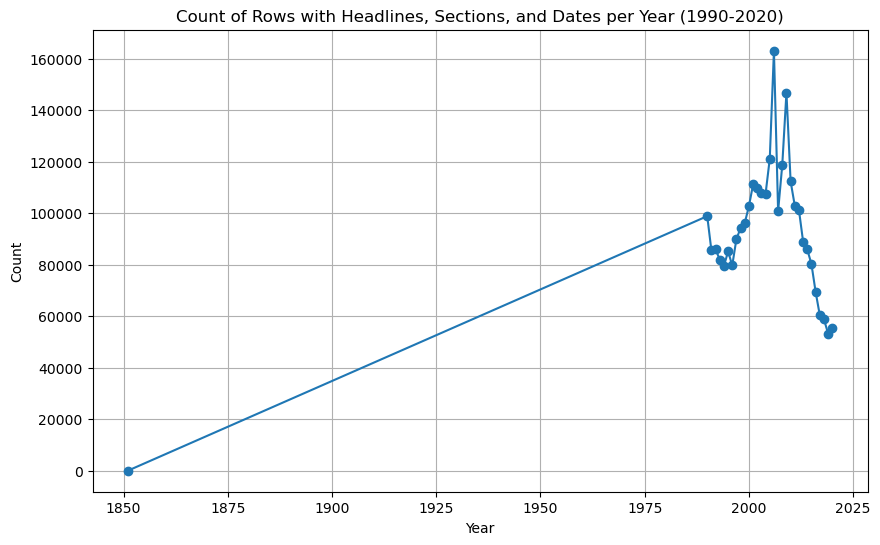

In [3]:
df_clean = df.dropna(subset=['headline', 'section', 'pub_date']).copy()

# Here we convert to datetime
df_clean['pub_date'] = pd.to_datetime(df_clean['pub_date'], errors='coerce')

# Group by year and count the rows
yearly_counts = df_clean.groupby('year').size().reset_index(name='count')

plt.figure(figsize=(10, 6))
plt.plot(yearly_counts['year'], yearly_counts['count'], marker='o')
plt.title('Count of Rows with Headlines, Sections, and Dates per Year (1990-2020)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()


**Need for Filtering:** We see that there are a few dates outside of the range from 1990 to 2020. Let's investigate these and filter. (there are some in 1851).

In [4]:
start_year = 1990
end_year = 2020

# Filter rows where the 'pub_date' is outside the range
out_of_range_df = df_clean[(df_clean['pub_date'].dt.year < start_year) | (df_clean['pub_date'].dt.year > end_year)]

print("Rows where the 'pub_date' is outside the 1990-2020 range:")
display(out_of_range_df)

Rows where the 'pub_date' is outside the 1990-2020 range:


,headline,source,word_count,url,print_section,print_page,author,type,pub_date,news_desk,section,year
686282,PHILADELPHIA.; Gov. Johnston--City Consolidati...,The New York Times,0.0,https://www.nytimes.com/1851/09/18/archives/ph...,NaN,3.0,Correspondence of the New-York Daily Times,article,1851-09-18 05:00:00+00:00,NaN,Archives,1851.0
686283,SPECIAL NOTICES.,The New York Times,0.0,https://www.nytimes.com/1851/09/18/archives/sp...,NaN,3.0,NaN,article,1851-09-18 05:00:00+00:00,NaN,Archives,1851.0
686284,Article 2 -- No Title,The New York Times,0.0,https://www.nytimes.com/1851/09/18/archives/ar...,NaN,2.0,NaN,article,1851-09-18 05:00:00+00:00,NaN,Archives,1851.0
686285,MARINE INTELLIGENCE.; Cleared. Arrived. Try Te...,The New York Times,0.0,https://www.nytimes.com/1851/09/18/archives/ma...,NaN,4.0,NaN,article,1851-09-18 05:00:00+00:00,NaN,Archives,1851.0
686286,Article 5 -- No Title,The New York Times,0.0,https://www.nytimes.com/1851/09/18/archives/ar...,NaN,2.0,NaN,article,1851-09-18 05:00:00+00:00,NaN,Archives,1851.0
686287,Removal of the Seat of Government in Canada.,The New York Times,0.0,https://www.nytimes.com/1851/09/18/archives/re...,NaN,4.0,NaN,article,1851-09-18 05:00:00+00:00,NaN,Archives,1851.0
686288,Liberty Party Convention.,The New York Times,0.0,https://www.nytimes.com/1851/09/18/archives/li...,NaN,4.0,NaN,article,1851-09-18 05:00:00+00:00,NaN,Archives,1851.0
686289,Article 15 -- No Title,The New York Times,0.0,https://www.nytimes.com/1851/09/18/archives/ar...,NaN,3.0,NaN,article,1851-09-18 05:00:00+00:00,NaN,Archives,1851.0
686290,NEW-YORK CITY.; DEATH OF A BAPTIST MISSIONARY....,The New York Times,0.0,https://www.nytimes.com/1851/09/18/archives/ne...,NaN,1.0,NaN,article,1851-09-18 05:00:00+00:00,NaN,Archives,1851.0
686291,Cuba.,The New York Times,0.0,https://www.nytimes.com/1851/09/18/archives/cu...,NaN,2.0,NaN,article,1851-09-18 05:00:00+00:00,NaN,Archives,1851.0


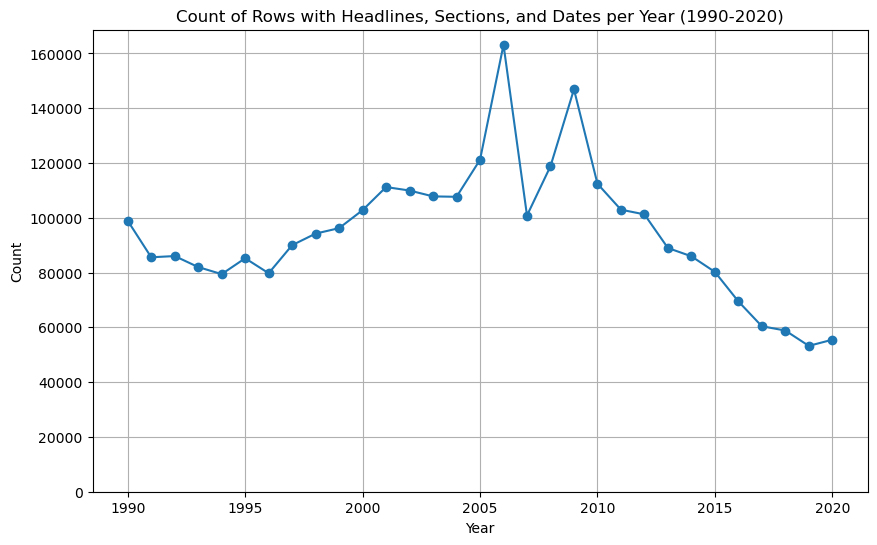

In [5]:
df_clean = df.dropna(subset=['headline', 'section', 'pub_date']).copy()

df_clean['pub_date'] = pd.to_datetime(df_clean['pub_date'], errors='coerce')

# Now! filter rows for years between 1990 and 2020
filtered_df = df_clean[(df_clean['pub_date'].dt.year >= 1990) & (df_clean['pub_date'].dt.year <= 2020)].copy()

filtered_df.loc[:, 'year'] = filtered_df['pub_date'].dt.year

yearly_counts = filtered_df.groupby('year').size().reset_index(name='count')

plt.figure(figsize=(10, 6))
plt.plot(yearly_counts['year'], yearly_counts['count'], marker='o')
plt.title('Count of Rows with Headlines, Sections, and Dates per Year (1990-2020)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.ylim(bottom=0)
plt.grid(True)
plt.show()

**Note on Data Imbalance** While in 2005 we have nearly 100,000 more headline titles than in 2020, we will leave this for now since in 2020 we still have 60,000 Headlines. To deal with the data imbalance, we may later randomly headlines samples evenly distributed over time.

# **Sentiment Analysis**

In this section, we will try out the following several implementations of sentiment analysis:

1. **Textblob** 

2. **Flair**

3. **VADAR**

In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import preprocessor as p
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from  nltk.tokenize import word_tokenize
from nltk import pos_tag
import matplotlib.pyplot as plt
from textblob import TextBlob
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

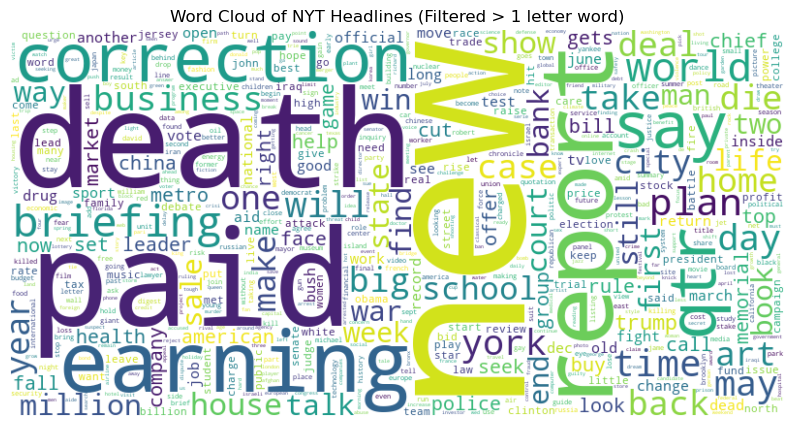

In [7]:
text = " ".join(headline for headline in filtered_df['headline'])

# Filter out single letters and non-alphabetical tokens
filtered_text = " ".join(word.lower() for word in text.split() if len(word) > 1 and word.isalpha())

word_cloud = WordCloud(
    background_color="white",
    max_words=1000,
    width=800,
    height=400,
    collocations=False 
).generate(filtered_text)

plt.figure(figsize=(10, 6))
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis('off')
plt.title("Word Cloud of NYT Headlines (Filtered > 1 letter word)")
plt.show()



In [8]:
text = " ".join(headline for headline in filtered_df['headline'])
words = [word.lower() for word in text.split() if word.isalpha()]
word_counts = Counter(words)

# Get the 10 most common words
common_words = word_counts.most_common(100)
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])
print(common_words_df)

       Word  Frequency
0       the     653162
1         a     496583
2        to     483101
3        in     464067
4        of     389549
..      ...        ...
95  company      13039
96    china      12971
97      way      12971
98      say      12949
99    where      12868

[100 rows x 2 columns]


# TextBlob Implmentation

In [9]:
from textblob import TextBlob
from tqdm import tqdm

tqdm.pandas()
def compute_score(review):
    sentiment = TextBlob(review)
    score = sentiment.sentiment.polarity
    return score

def sentiment_analyzer(score):
    if score > 0:
        return "positive"
    elif score < 0:
        return "negative"
    else:
        return "neutral"

# Finds polarity score for each headline
filtered_df["score"] = filtered_df["headline"].progress_apply(compute_score)

# Positive, Neutral, Negative label
filtered_df["sentiment"] = filtered_df["score"].apply(sentiment_analyzer)

filtered_df[['headline', 'score', 'sentiment']].head()



100%|██████████| 2937192/2937192 [03:09<00:00, 15491.59it/s]


,headline,score,sentiment
0,Bridge,0.00,neutral
1,He Has Tyson On His Mind,0.00,neutral
2,"For Dinkins, Pomp, Ceremony, Triumph And a Dre...",0.00,neutral
3,Army Doesn't Have to Compete With Marines; W...,0.00,neutral
4,Students Must Get to School and Back Safely,0.25,positive


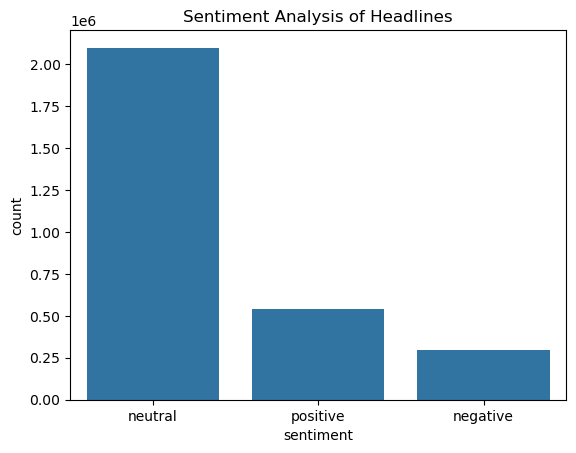

In [10]:
sns.countplot(data=filtered_df, x='sentiment')
plt.title('Sentiment Analysis of Headlines')
plt.savefig('foo1.png')
plt.show()

In [11]:
filtered_df_sorted = filtered_df.sort_values(by="score", ascending=False)

print("Most Positive Headlines:")
print(filtered_df_sorted[['headline', 'score']].head(5))

print("\nMost Negative Headlines:")
print(filtered_df_sorted[['headline', 'score']].tail(5))

non_extreme_scores_df = filtered_df[(filtered_df['score'] != 0) & 
                                    (filtered_df['score'] != 1) & 
                                    (filtered_df['score'] != -1)]

# Select 3 random headlines from the non-extreme scores
print("\nRandom Non-Extreme Headlines and Their Sentiment Scores:")
print(non_extreme_scores_df[['headline', 'score']].sample(3))


Most Positive Headlines:
                                                  headline  score
1396508                  The Best of Week 16 in the N.F.L.    1.0
1847363  What’s on TV Wednesday: ‘Pitch Perfect’ and ‘S...    1.0
1199751                   BEST SELLERS: September 23, 2001    1.0
1846330                       The Best Recipes of the Year    1.0
508869                   Sausalito at Its Best: Off-Season    1.0

Most Negative Headlines:
                                                  headline  score
1817744  Review: ‘Outrageous Acts of Danger’ Makes Scie...   -1.0
2784531  Are Lawyers Truly Evil, or Just Doing the Job?...   -1.0
1705914        Grim News at the Front, and Debates at Home   -1.0
676337   Sarajevo Is Hit by Artillery Fire in Worst Att...   -1.0
2227220             Read This, or Be the Worst Parent Ever   -1.0

Random Non-Extreme Headlines and Their Sentiment Scores:
                                                  headline     score
211954   New York Bancorp repo

Here, we can see the breakdown of the TextBlob sentiment scores and their affects, along with a few positive and negative examples.

# BERT

In [12]:
from transformers import pipeline

# Initialize the sentiment-analysis pipeline with a pre-trained model and set it to use the GPU
classifier = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english", device=0)

# Example NYT headline
headline = "New York Faces Unprecedented Storm"

# Perform sentiment analysis
result = classifier(headline)[0]

# Convert sentiment to a numerical score: positive sentiment as positive score, negative as negative score
score = result['score'] if result['label'] == "POSITIVE" else -result['score']
print(f"Headline: {headline}")
print(f"Sentiment Label: {result['label']}")
print(f"Sentiment Score: {score}")




Headline: New York Faces Unprecedented Storm
Sentiment Label: POSITIVE
Sentiment Score: 0.7696330547332764


In [16]:
from transformers import pipeline
from tqdm import tqdm

# Define the number of headlines to process (e.g., 100)
subset_size = 100
subset_df = filtered_df.head(subset_size)  # You could also use filtered_df.iloc[:subset_size]

# Initialize the sentiment-analysis pipeline with a pre-trained model and set it to use the GPU
classifier = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english", device=0)

# Initialize empty lists to store results
sentiment_labels = []
sentiment_scores = []

# Run sentiment analysis on each headline in the subset with a progress bar
for headline in tqdm(subset_df['headline'], desc="Processing headlines"):
    result = classifier(headline)[0]
    # Append label and score to respective lists
    sentiment_labels.append(result['label'])
    sentiment_scores.append(result['score'] if result['label'] == "POSITIVE" else -result['score'])

# Add the results to the subset DataFrame
subset_df['sentiment_label'] = sentiment_labels
subset_df['sentiment_score'] = sentiment_scores

# Display the first few rows of the updated subset DataFrame
display(subset_df.head())


Processing headlines: 100%|██████████| 100/100 [00:01<00:00, 59.40it/s]
/var/folders/rp/g4tg7sg164bcfkxk2nc79c3r0000gn/T/ipykernel_17813/3172028062.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['sentiment_label'] = sentiment_labels
/var/folders/rp/g4tg7sg164bcfkxk2nc79c3r0000gn/T/ipykernel_17813/3172028062.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['sentiment_score'] = sentiment_scores


,headline,source,word_count,url,print_section,print_page,author,type,pub_date,news_desk,section,year,score,sentiment,sentiment_label,sentiment_score
0,Bridge,The New York Times,411.0,https://www.nytimes.com/1990/01/01/nyregion/br...,1,45.0,By Alan Truscott,article,1990-01-01 05:00:00+00:00,Metropolitan Desk,New York,1990.0,0.00,neutral,POSITIVE,0.994084
1,He Has Tyson On His Mind,The New York Times,199.0,https://www.nytimes.com/1990/01/01/sports/spor...,1,38.0,By Phil Berger,article,1990-01-01 05:00:00+00:00,Sports Desk,Sports,1990.0,0.00,neutral,POSITIVE,0.996458
2,"For Dinkins, Pomp, Ceremony, Triumph And a Dre...",The New York Times,1233.0,https://www.nytimes.com/1990/01/01/nyregion/fo...,1,27.0,By Don Terry,article,1990-01-01 05:00:00+00:00,Metropolitan Desk,New York,1990.0,0.00,neutral,POSITIVE,0.999768
3,Army Doesn't Have to Compete With Marines; W...,The New York Times,524.0,https://www.nytimes.com/1990/01/01/opinion/l-a...,1,24.0,NaN,article,1990-01-01 05:00:00+00:00,Editorial Desk,Opinion,1990.0,0.00,neutral,NEGATIVE,-0.985253
4,Students Must Get to School and Back Safely,The New York Times,363.0,https://www.nytimes.com/1990/01/01/opinion/l-s...,1,24.0,NaN,article,1990-01-01 05:00:00+00:00,Editorial Desk,Opinion,1990.0,0.25,positive,POSITIVE,0.993719


In [14]:
#Full Analysis = 14 hours
from transformers import pipeline

classifier = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english", device=0)

# Initialize empty lists to store results
sentiment_labels = []
sentiment_scores = []

# Run sentiment analysis on each headline with a progress bar
for headline in tqdm(filtered_df['headline'], desc="Processing headlines"):
    result = classifier(headline)[0]
    # Append label and score to respective lists
    sentiment_labels.append(result['label'])
    sentiment_scores.append(result['score'] if result['label'] == "POSITIVE" else -result['score'])

# Add the results to the DataFrame
filtered_df['sentiment_label'] = sentiment_labels
filtered_df['sentiment_score'] = sentiment_scores

# Display the first few rows of the updated DataFrame
print(filtered_df.head())


Processing headlines:   0%|          | 8473/2937192 [02:18<13:16:08, 61.31it/s]


KeyboardInterrupt: 